# Business Understanding
Here you need to pose three questions of your interest related to the movie dataset:  
-  Which genres are more common?
-  Which genre (on average) cost more to produce?
-  Which genre (on average) generates more revenue?

In [54]:
#import libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [55]:
# loading the data to a DataFrame
df_moves = pd.read_csv('tmdb-movies.csv')



# Data Understanding



In [56]:

df_moves.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [57]:
# printing the number of rows and columns
print(f'the dataframe has {df_moves.shape[0]} rows and {df_moves.shape[1]} columns')

the dataframe has 10866 rows and 21 columns


In [58]:
#Use .info() and .describe() to get some insights:
print(df_moves.info())
print(df_moves.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Data Preparation:


In [59]:
#Removing unwanted columns

df_moves = df_moves.drop(['homepage', 'tagline', 'overview', 'imdb_id',  'keywords', 'cast', 'production_companies'], axis=1)


In [60]:
# Converting release_date from a string to datetime object

df_moves['release_date'] = df_moves['release_date'].apply(pd.to_datetime)


In [61]:
# Calculating the number of missing valuse in the dataset

df_moves.isnull().sum()


id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [62]:
# Dropping null values
df_moves.dropna(inplace=True)

In [63]:
# Calculating the number of duplicated rows
df_moves.duplicated().sum()

1

In [64]:
#dropping diplicated rows
df_moves.drop_duplicates(inplace=True)

In [65]:
#splitting genres column
get_first_genre = lambda x: x.split('|')[0]

df_moves['genres'] = df_moves['genres'].apply(get_first_genre)



## Question 1: Which Genres are more common?


Increasing the plot size to improve readability 

In [70]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 9, 6

[12.0, 8.0]


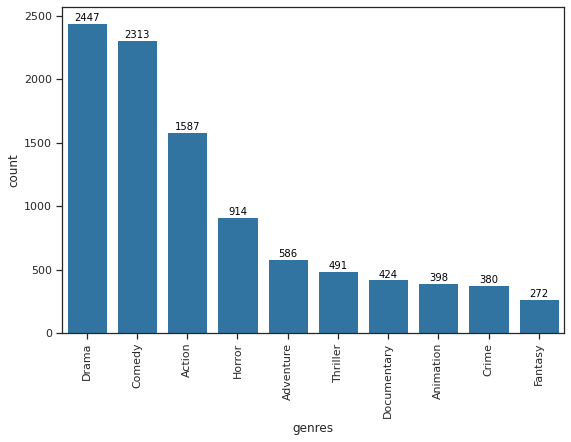

In [72]:
# crating a barplot for the number of movies per genre

genres = df_moves['genres'].value_counts()
base_color = sns.color_palette()[0]
genres_order = genres.iloc[:10].index # to plot only the top 10 genres
sns.countplot(data=df_moves, x='genres', color=base_color, order=genres_order);

locs, labels = plt.xticks(rotation=90)

for loc, label in zip(locs, labels):
    count = genres[label.get_text()]
    pct_string = f'{count}'

    plt.text(loc, count+15,pct_string, ha='center', color='black')



### Finding: 
Drama moves are more commonly produce folowed by comedy, action and the rest

## Question 2: Which genre (on average) cost more to produce?

In [93]:

def get_list_df_types(df, col):
    '''
    INPUT:
    df - dataframe
    col - string of targeted column name 

    OUTPUT:
    list_df - list of dataframes each one contaning only one value of the targeted column
    types - list of all the valus in the column
    
    '''
    types = df[col].value_counts().index # list of all the types in col

    list_df = []

    for type in types:
        list_df.append(df[df[col] == type])

    return types, list_df
    

get_average_budget = lambda c: c.budget.mean() # takes a df as an input and return the budget mean



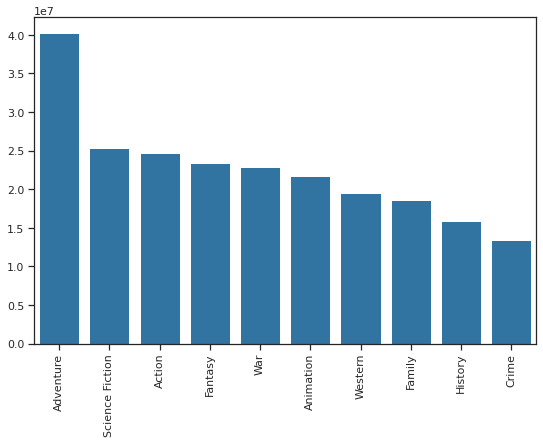

In [105]:
types, list_df_genres = get_list_df_types(df_moves, 'genres')
aves = dict() # {genre: budget mean}

# populating aves dict
for df, type in zip(list_df_genres, types):
    aves[type] = get_average_budget(df)

# covering dict to a pandas series
budget_serie = pd.Series(aves)
budget_serie.sort_values(ascending=False, inplace=True)

# creating a barplot using buget_seris

sns.barplot(x=budget_serie.index[:10], y=budget_serie.values[:10], color=base_color)
plt.xticks(rotation=90);

### Findings:


Adventure moves have significantly more budget then other genres.

## Question3: Which genre (on average) generates more revenue?

In [84]:
get_average_revenue = lambda c: c.revenue.mean()  # takes a df as an input and return the revanue mean


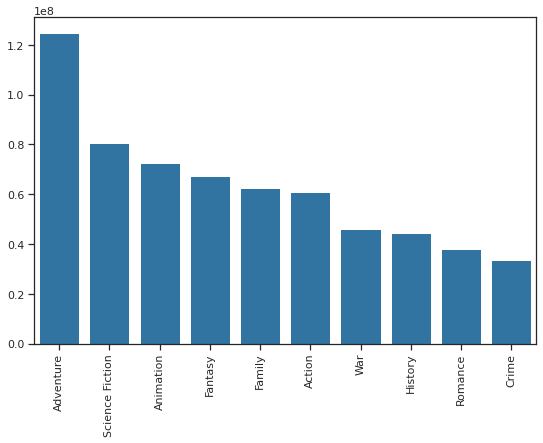

In [107]:
types, list_df_revenues = get_list_df_types(df_moves, 'genres')
aves_rev = dict() # {genre: budget mean}

# populating aves dict
for df, type in zip(list_df_revenues, types):
    aves_rev[type] = get_average_revenue(df)

# covering dict to a pandas series
revanue_serie = pd.Series(aves_rev)
revanue_serie.sort_values(ascending=False, inplace=True)

# creating a barplot using buget_seris

sns.barplot(x=revanue_serie.index[:10], y=revanue_serie.values[:10], color=base_color)
plt.xticks(rotation=90);

# $nnn.nn Million

### Finding:


Adventure moves generate significantly more revenue then other genres.

# Conclusion:

In [108]:
#export the dataframe to csv file:
df_moves.to_csv('move_df.csv', index=False)